In [24]:
# importing required packages
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# a] Loading and preprocessing the image data 
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data() #splitting into training and testing data
input_shape = (28,28,1)

In [28]:
#the values are float to get decimal pts after division
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [30]:
print ("Datatype of x_train :" , x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print ("Data type after converting to float:", x_train.dtype)

Datatype of x_train : uint8
Data type after converting to float: float32


In [32]:
#Normalizing the RGB codes by dividing it to max RGB value
x_train = x_train /255
x_test = x_test /255
print("shape of training : ", x_train.shape)
print("shape of testing : ", x_test.shape)


shape of training :  (60000, 28, 28, 1)
shape of testing :  (10000, 28, 28, 1)


In [34]:
# b] defining the model architecture 
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# c] Training the model 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train,y_train,epochs =2)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8884 - loss: 0.3640


In [37]:
# d] Estimating model's performance
test_loss ,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9659 - loss: 0.1045
Loss=0.089
Accuracy=0.972


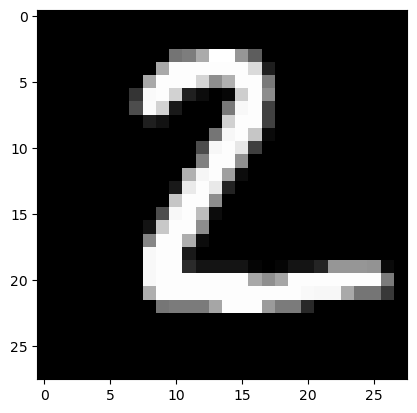

In [38]:
#showing img at position[] from datasets
image =x_test[1]
plt.imshow(np.squeeze(image),cmap='grey')
plt.show()


In [39]:
#predicting class of img
image=image.reshape(1,image.shape[0], image.shape[1],image.shape[2]) 
predict_model =model.predict([image])
print("Predicted class: {}" .format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted class: 2
